In [49]:
import numpy as np
from matplotlib import pyplot as plt

### Investigating the arithmetic function np.add

In [3]:
help(np.add)

Help on ufunc object:

add = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  **Calling ufuncs:** ``op(*x[, out], where=True, **kwargs)``
 |  
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array object(s) in whic

In [17]:
list_ufunc = dir(np.add)
x = [l  for l in list_ufunc if l[0]!='_']
x

['accumulate',
 'at',
 'identity',
 'nargs',
 'nin',
 'nout',
 'ntypes',
 'outer',
 'reduce',
 'reduceat',
 'resolve_dtypes',
 'signature',
 'types']

#### Accumulate

In [15]:
help(np.add.accumulate)

Help on built-in function accumulate:

accumulate(...) method of numpy.ufunc instance
    accumulate(array, axis=0, dtype=None, out=None)
    
    Accumulate the result of applying the operator to all elements.
    
    For a one-dimensional array, accumulate produces results equivalent to::
    
      r = np.empty(len(A))
      t = op.identity        # op = the ufunc being applied to A's  elements
      for i in range(len(A)):
          t = op(t, A[i])
          r[i] = t
      return r
    
    For example, add.accumulate() is equivalent to np.cumsum().
    
    For a multi-dimensional array, accumulate is applied along only one
    axis (axis zero by default; see Examples below) so repeated use is
    necessary if one wants to accumulate over multiple axes.
    
    Parameters
    ----------
    array : array_like
        The array to act on.
    axis : int, optional
        The axis along which to apply the accumulation; default is zero.
    dtype : data-type code, optional
        

In [16]:
np.add.accumulate([2,3,5])

array([ 2,  5, 10])

In [18]:
I=np.eye(4)
I

In [19]:
np.add.accumulate(I,0)

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [20]:
np.add.accumulate(I,1)

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

#### Investigatin np.add.at

In [21]:
help(np.add.at)

Help on built-in function at:

at(...) method of numpy.ufunc instance
    at(a, indices, b=None, /)
    
    Performs unbuffered in place operation on operand 'a' for elements
    specified by 'indices'. For addition ufunc, this method is equivalent to
    ``a[indices] += b``, except that results are accumulated for elements that
    are indexed more than once. For example, ``a[[0,0]] += 1`` will only
    increment the first element once because of buffering, whereas
    ``add.at(a, [0,0], 1)`` will increment the first element twice.
    
    .. versionadded:: 1.8.0
    
    Parameters
    ----------
    a : array_like
        The array to perform in place operation on.
    indices : array_like or tuple
        Array like index object or slice object for indexing into first
        operand. If first operand has multiple dimensions, indices can be a
        tuple of array like index objects or slice objects.
    b : array_like
        Second operand for ufuncs requiring two operands. Op

In [33]:
#a is a one dimensional array, b is a list of indexes which we gonna apply the arithmetic operation add c to
a = np.array([1, 2, 3, 4])
b = [0,1,2,2,2,2,3]
c = 2
np.add.at(a,b,2)
a

array([ 3,  4, 11,  6])

##### Let's test to get the histogram function from np.add.at

In [79]:
a = np.random.randint(0,256, size=(10000,10000), dtype=np.uint8)
b = np.zeros(256)

In [93]:
%%time
np.add.at(b, a, 1)

CPU times: user 4.47 s, sys: 18.9 ms, total: 4.49 s
Wall time: 4.49 s


In [94]:
%%time
c = np.histogram(a,np.arange(256))

CPU times: user 2.74 s, sys: 9.66 ms, total: 2.75 s
Wall time: 2.75 s


<BarContainer object of 256 artists>

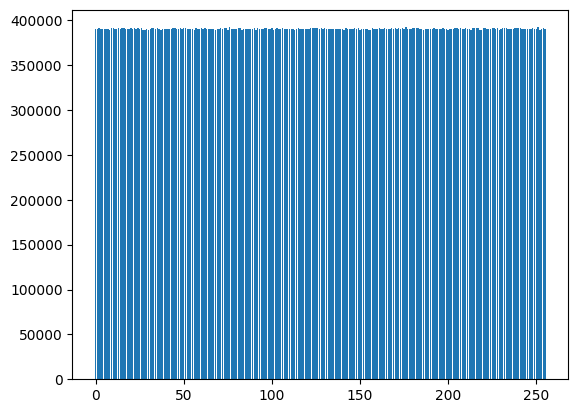

In [82]:
plt.bar(np.arange(256), b)

In [96]:
help(np.all)

Help on function all in module numpy:

all(a, axis=None, out=None, keepdims=<no value>, *, where=<no value>)
    Test whether all array elements along a given axis evaluate to True.
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a logical AND reduction is performed.
        The default (``axis=None``) is to perform a logical AND over all
        the dimensions of the input array. `axis` may be negative, in
        which case it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a reduction is performed on multiple
        axes, instead of a single axis or all the axes as before.
    out : ndarray, optional
        Alternate output array in which to place the result.
        It must have the same shape as the expected output and its
        type is preserved (e.g., if 

In [97]:
help(np.amax)

Help on function amax in module numpy:

amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)
    Return the maximum of an array or maximum along an axis.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : None or int or tuple of ints, optional
        Axis or axes along which to operate.  By default, flattened input is
        used.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, the maximum is selected over multiple axes,
        instead of a single axis or all the axes as before.
    out : ndarray, optional
        Alternative output array in which to place the result.  Must
        be of the same shape and buffer length as the expected output.
        See :ref:`ufuncs-output-type` for more details.
    
    keepdims : bool, optional
        If this is set to True, the axes which are reduced are left
        in the result as dimensions with size one. With this option,
        the result

In [98]:
a = np.arange(4).reshape((2,2))

In [99]:
print(np.amax(a))
print(np.max(a))

3
3


In [100]:
help(np.angle)

Help on function angle in module numpy:

angle(z, deg=False)
    Return the angle of the complex argument.
    
    Parameters
    ----------
    z : array_like
        A complex number or sequence of complex numbers.
    deg : bool, optional
        Return angle in degrees if True, radians if False (default).
    
    Returns
    -------
    angle : ndarray or scalar
        The counterclockwise angle from the positive real axis on the complex
        plane in the range ``(-pi, pi]``, with dtype as numpy.float64.
    
        .. versionchanged:: 1.16.0
            This function works on subclasses of ndarray like `ma.array`.
    
    See Also
    --------
    arctan2
    absolute
    
    Notes
    -----
    Although the angle of the complex number 0 is undefined, ``numpy.angle(0)``
    returns the value 0.
    
    Examples
    --------
    >>> np.angle([1.0, 1.0j, 1+1j])               # in radians
    array([ 0.        ,  1.57079633,  0.78539816]) # may vary
    >>> np.angle(1+1j, d

#### Investigate np.any

In [101]:
help(np.any)

Help on function any in module numpy:

any(a, axis=None, out=None, keepdims=<no value>, *, where=<no value>)
    Test whether any array element along a given axis evaluates to True.
    
    Returns single boolean if `axis` is ``None``
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a logical OR reduction is performed.
        The default (``axis=None``) is to perform a logical OR over all
        the dimensions of the input array. `axis` may be negative, in
        which case it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a reduction is performed on multiple
        axes, instead of a single axis or all the axes as before.
    out : ndarray, optional
        Alternate output array in which to place the result.  It must have
        the same shape as the expecte

In [118]:
#The code below will check if there is any value that satisfies the condition
x=np.arange(10)
np.any(x>4)

True

## Important: Understanding axis in numpy

In [135]:
np.random.seed(42)
x = np.random.randint(0,100,(4,4))
x

array([[51, 92, 14, 71],
       [60, 20, 82, 86],
       [74, 74, 87, 99],
       [23,  2, 21, 52]])

In [136]:
#what is axis 0: to get the value we need to fix the value on axis 1, for example 0 
#The array showed below this cell correspond to the value on axis 0 for the select column index, here 0, on axis 1
x[:,0]

array([51, 60, 74, 23])

In [137]:
#what is axis 1: to get the value we need to fix the value on axis 0, for example 0 
#The array showed below this cell correspond to the value on axis 1 for the select column index, here 0, on axis 0
x[0,:]

array([51, 92, 14, 71])

In [138]:
#Let's say we want to perform sum on axis 0
np.sum(x, axis=0)

array([208, 188, 204, 308])

In [139]:
#We should find the same result for the first element
np.sum(x[:,0])

208

In [142]:
#Let's check with 3 dimensions:
np.random.seed(42)
x = np.random.randint(0,100,(4,4,4))
x

array([[[51, 92, 14, 71],
        [60, 20, 82, 86],
        [74, 74, 87, 99],
        [23,  2, 21, 52]],

       [[ 1, 87, 29, 37],
        [ 1, 63, 59, 20],
        [32, 75, 57, 21],
        [88, 48, 90, 58]],

       [[41, 91, 59, 79],
        [14, 61, 61, 46],
        [61, 50, 54, 63],
        [ 2, 50,  6, 20]],

       [[72, 38, 17,  3],
        [88, 59, 13,  8],
        [89, 52,  1, 83],
        [91, 59, 70, 43]]])

In [146]:
#Let's visualize the first axis:
np.sum(x,axis=2)

array([[228, 248, 334,  98],
       [154, 143, 185, 284],
       [270, 182, 228,  78],
       [130, 168, 225, 263]])

In [149]:
np.sum(x[0,0,:])

228

In [151]:
x[0,0,:]

array([51, 92, 14, 71])

#### Investigate np.append

In [153]:
help(np.append)

Help on function append in module numpy:

append(arr, values, axis=None)
    Append values to the end of an array.
    
    Parameters
    ----------
    arr : array_like
        Values are appended to a copy of this array.
    values : array_like
        These values are appended to a copy of `arr`.  It must be of the
        correct shape (the same shape as `arr`, excluding `axis`).  If
        `axis` is not specified, `values` can be any shape and will be
        flattened before use.
    axis : int, optional
        The axis along which `values` are appended.  If `axis` is not
        given, both `arr` and `values` are flattened before use.
    
    Returns
    -------
    append : ndarray
        A copy of `arr` with `values` appended to `axis`.  Note that
        `append` does not occur in-place: a new array is allocated and
        filled.  If `axis` is None, `out` is a flattened array.
    
    See Also
    --------
    insert : Insert elements into an array.
    delete : Delet

In [154]:
np.random.seed(42)
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



In [162]:
x = np.random.randint(5,10,(2,2))
y = np.random.randint(0,5,(3,2))

In [163]:
np.append(x,y)

array([6, 8, 5, 5, 0, 0, 2, 0, 3, 4])

### Investigate np.along_axis

In [164]:
help(np.apply_along_axis)

Help on function apply_along_axis in module numpy:

apply_along_axis(func1d, axis, arr, *args, **kwargs)
    Apply a function to 1-D slices along the given axis.
    
    Execute `func1d(a, *args, **kwargs)` where `func1d` operates on 1-D arrays
    and `a` is a 1-D slice of `arr` along `axis`.
    
    This is equivalent to (but faster than) the following use of `ndindex` and
    `s_`, which sets each of ``ii``, ``jj``, and ``kk`` to a tuple of indices::
    
        Ni, Nk = a.shape[:axis], a.shape[axis+1:]
        for ii in ndindex(Ni):
            for kk in ndindex(Nk):
                f = func1d(arr[ii + s_[:,] + kk])
                Nj = f.shape
                for jj in ndindex(Nj):
                    out[ii + jj + kk] = f[jj]
    
    Equivalently, eliminating the inner loop, this can be expressed as::
    
        Ni, Nk = a.shape[:axis], a.shape[axis+1:]
        for ii in ndindex(Ni):
            for kk in ndindex(Nk):
                out[ii + s_[...,] + kk] = func1d(arr[ii 

In [202]:
b = np.array([[1,2,3], [4,5,6], [7,8,9]])
b **=2
b

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [203]:
np.apply_along_axis(np.diff, 0, b)

array([[15, 21, 27],
       [33, 39, 45]])

In [204]:
np.apply_along_axis(np.diff, 1, b)

array([[ 3,  5],
       [ 9, 11],
       [15, 17]])

### For help
See my post here to understand some possible confusion related to the axis
https://stackoverflow.com/a/76358421/12490827

#### Investigate np.apply_over_axes

This function is similar to apply_along_axis but does fit well for multi-dimensional array with several axis

In [205]:
help(np.apply_over_axes)

Help on function apply_over_axes in module numpy:

apply_over_axes(func, a, axes)
    Apply a function repeatedly over multiple axes.
    
    `func` is called as `res = func(a, axis)`, where `axis` is the first
    element of `axes`.  The result `res` of the function call must have
    either the same dimensions as `a` or one less dimension.  If `res`
    has one less dimension than `a`, a dimension is inserted before
    `axis`.  The call to `func` is then repeated for each axis in `axes`,
    with `res` as the first argument.
    
    Parameters
    ----------
    func : function
        This function must take two arguments, `func(a, axis)`.
    a : array_like
        Input array.
    axes : array_like
        Axes over which `func` is applied; the elements must be integers.
    
    Returns
    -------
    apply_over_axis : ndarray
        The output array.  The number of dimensions is the same as `a`,
        but the shape can be different.  This depends on whether `func`
       

In [208]:
np.random.seed(42)
a = np.random.randint(0,4,(3,3,3,3))
a

array([[[[2, 3, 0],
         [2, 2, 3],
         [0, 0, 2]],

        [[1, 2, 2],
         [2, 2, 3],
         [0, 3, 3]],

        [[3, 2, 1],
         [0, 1, 3],
         [3, 1, 1]]],


       [[[1, 3, 3],
         [0, 0, 3],
         [1, 1, 0]],

        [[3, 0, 0],
         [2, 2, 2],
         [1, 3, 3]],

        [[3, 3, 2],
         [1, 1, 2],
         [1, 2, 3]]],


       [[[2, 3, 3],
         [0, 2, 0],
         [2, 2, 0]],

        [[0, 2, 1],
         [3, 0, 3],
         [1, 1, 1]],

        [[0, 1, 0],
         [1, 3, 3],
         [2, 3, 2]]]])

In [209]:
a[:,0,0,0]

array([2, 1, 2])

In [210]:
a[:,1,0,0]

array([1, 3, 0])

In [211]:
a[:,2,0,0]

array([3, 3, 0])

In [217]:
b = np.apply_over_axes(np.diff, a, [0,2])

array([[[[-4],
         [ 1],
         [ 2]],

        [[-1],
         [ 1],
         [-3]],

        [[ 0],
         [ 1],
         [ 2]]],


       [[[-2],
         [ 3],
         [-1]],

        [[ 3],
         [ 0],
         [-2]],

        [[-1],
         [ 1],
         [ 0]]],


       [[[-1],
         [-4],
         [-2]],

        [[-3],
         [ 6],
         [ 0]],

        [[-2],
         [-2],
         [-2]]]])

In [218]:
b.shape

(3, 3)

In [221]:
a

array([[[[2, 3, 0],
         [2, 2, 3],
         [0, 0, 2]],

        [[1, 2, 2],
         [2, 2, 3],
         [0, 3, 3]],

        [[3, 2, 1],
         [0, 1, 3],
         [3, 1, 1]]],


       [[[1, 3, 3],
         [0, 0, 3],
         [1, 1, 0]],

        [[3, 0, 0],
         [2, 2, 2],
         [1, 3, 3]],

        [[3, 3, 2],
         [1, 1, 2],
         [1, 2, 3]]],


       [[[2, 3, 3],
         [0, 2, 0],
         [2, 2, 0]],

        [[0, 2, 1],
         [3, 0, 3],
         [1, 1, 1]],

        [[0, 1, 0],
         [1, 3, 3],
         [2, 3, 2]]]])

In [222]:
a[1,2,0,:]

array([3, 3, 2])

In [ ]:
np.